In [1]:
using RLInterface
using ContinuumWorld
using Random
using Plots
using Revise
using SoftActorCritic

┌ Info: Precompiling SoftActorCritic [4431605d-f56c-43f7-b958-c314758684f6]
└ @ Base loading.jl:1278


In [2]:
ENV["JULIA_DEBUG"] = ""

""

In [3]:
sac = SAC(; 
    env_fn=()->MDPEnvironment(CWorld(; stdev=(0.1,0.1))), 
    obs_dim=2, 
    act_dim=2, 
    act_mins=[-1.0, -1.0],
    act_maxs=[1.0, 1.0])

SAC(var"#1#2"(), 2, 2, [-1.0, -1.0], [1.0, 1.0], 0.95, 100000, [100, 100, 100], NNlib.swish, Flux.Optimise.ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()), Flux.Optimise.ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()), Flux.Optimise.ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()), 64, 200, 200, 1000, 50, 300, 50, 0.995, -2.0, 200, Random._GLOBAL_RNG())

In [4]:
Random.seed!(123)
ac, info = solve(sac)

(SoftActorCritic.MLPActorCritic(SoftActorCritic.SquashedGaussianMLPActor(Chain(Dense(2, 100, swish), Dense(100, 100, swish), Dense(100, 100, swish)), Dense(100, 2), Dense(100, 2), [-1.0, -1.0], [1.0, 1.0], Random._GLOBAL_RNG()), SoftActorCritic.MLPQFunction(Chain(Dense(4, 100, swish), Dense(100, 100, swish), Dense(100, 100, swish), Dense(100, 1))), SoftActorCritic.MLPQFunction(Chain(Dense(4, 100, swish), Dense(100, 100, swish), Dense(100, 100, swish), Dense(100, 1)))), Dict{String,Any}("scores" => [-0.57, -0.005, 0.05, -0.585, -0.215, 0.02, 0.545, 1.66, 1.905, 2.33  …  9.69, 9.44, 9.64, 9.44, 9.895, 9.855, 9.865, 9.725, 9.8, 9.585]))

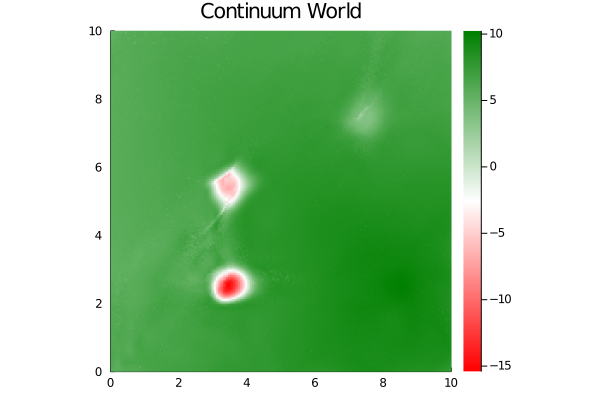

In [5]:
env = sac.env_fn()
plot(CWorldVis(env.problem, f=s->min(ac.q1(s,ac(s))[],ac.q2(s,ac(s))[])))

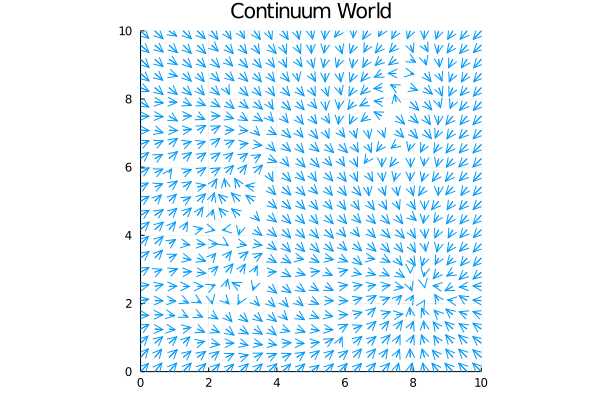

In [6]:
plot(CWorldVis(env.problem, fq=s->0.25.*ac(s)))

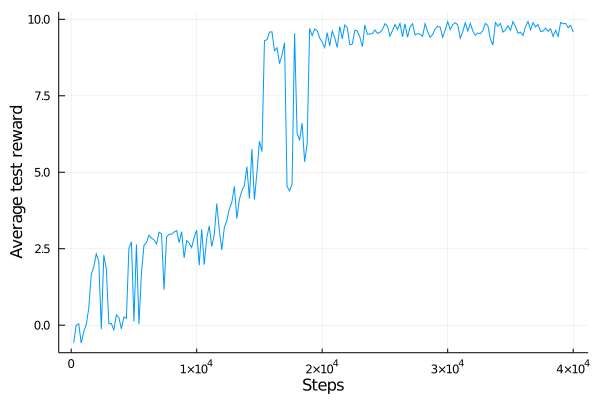

In [7]:
scores = info["scores"]
plot([i*sac.steps_per_epoch for i=1:length(scores)], scores, ylabel="Average test reward", xlabel="Steps", legend=false)

LoadError: InexactError: Int64(50//3)